In [7]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from omegaconf import DictConfig
import os
import pickle as pkl

from vsa_ogm.dataloaders import CSVDataLoader

In [8]:
# ------------------------
# Configuration Parameters
# ------------------------
data_config = DictConfig({
    "intel": {
        "data_dir": os.path.expanduser("~") + "/dev/highfrost/highfrost/ogm/datasets/single/intel.csv",
        "world_bounds": [-20, 20, -24, 12] # x_min, x_max, y_min, y_max; meters
    },
})

data_loader = CSVDataLoader(data_config.intel)
world_space = data_config.intel.world_bounds

Number of Point Clouds: 910
Number of Points: 383118
Number of Occupied Points: 159627.0
Number of Free Points: 223491.0


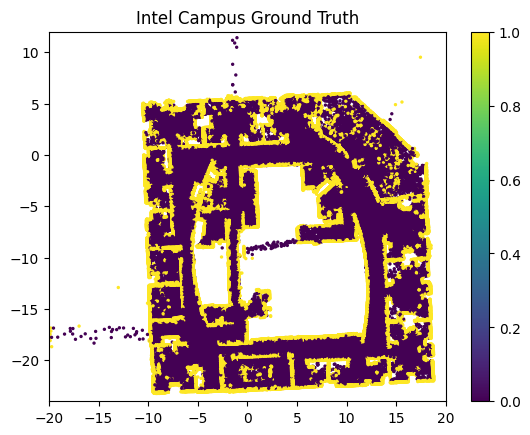

In [9]:
pcs = data_loader.point_clouds

full_campus_pcs = deepcopy(pcs)

with open("full_campus_pcs.pkl", "wb") as f:
    pkl.dump(full_campus_pcs, f)

plt.figure()

for pc in pcs:
    plt.scatter(pc[:,0], pc[:,1], c=pc[:, 2], s=2)

print(f"Number of Point Clouds: {len(pcs)}")
print(f"Number of Points: {sum([pc.shape[0] for pc in pcs])}")
print(f"Number of Occupied Points: {sum([np.sum(pc[:, 2]) for pc in pcs])}")
print(f"Number of Free Points: {sum([np.sum(1 - pc[:, 2]) for pc in pcs])}")

plt.title('Intel Campus Ground Truth')
plt.xlim(world_space[0], world_space[1])
plt.ylim(world_space[2], world_space[3])
plt.colorbar()
plt.show()

In [10]:
quadrant_dict: dict = {
    "quadrant_1": [range(0, 26), range(108, 127), range(190, 347), range(732, 752)],
    "quadrant_2": [range(26, 61), range(127, 140), range(347, 441), range(713, 732)],
    "quadrant_3": [range(61, 80), range(140, 166), range(441, 570), range(680, 713), range(819, 895)],
    "quadrant_4": [range(80, 108), range(166, 190), range(570, 680), range(752, 819), range(895, 910)],
}

q1_list = [list(rng) for rng in quadrant_dict["quadrant_1"]]
q2_list = [list(rng) for rng in quadrant_dict["quadrant_2"]]
q3_list = [list(rng) for rng in quadrant_dict["quadrant_3"]]
q4_list = [list(rng) for rng in quadrant_dict["quadrant_4"]]

quadrant_dict["quadrant_1"] = []
quadrant_dict["quadrant_2"] = []
quadrant_dict["quadrant_3"] = []
quadrant_dict["quadrant_4"] = []

for i in q1_list:
    quadrant_dict["quadrant_1"].extend(i)

for i in q2_list:
    quadrant_dict["quadrant_2"].extend(i)

for i in q3_list:
    quadrant_dict["quadrant_3"].extend(i)

for i in q4_list:
    quadrant_dict["quadrant_4"].extend(i)

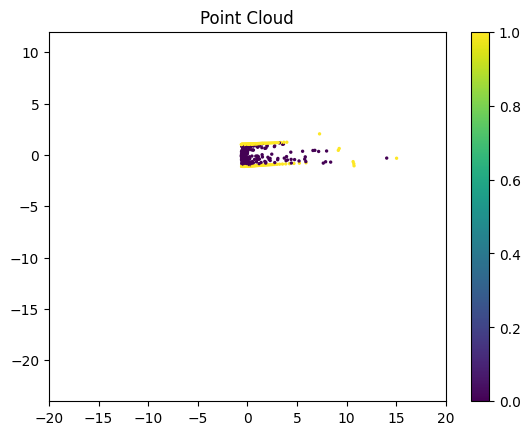

In [11]:
pcs = data_loader.point_clouds

plt.figure()

test_idx = 909

plt.scatter(pcs[test_idx][:,0], pcs[test_idx][:,1], c=pcs[test_idx][:, 2], s=2)


plt.title('Point Cloud')
plt.xlim(world_space[0], world_space[1])
plt.ylim(world_space[2], world_space[3])
plt.colorbar()
plt.show()

Number of Point Clouds: 222
Number of Points: 95301
Number of Occupied Points: 37009.0
Number of Free Points: 58292.0


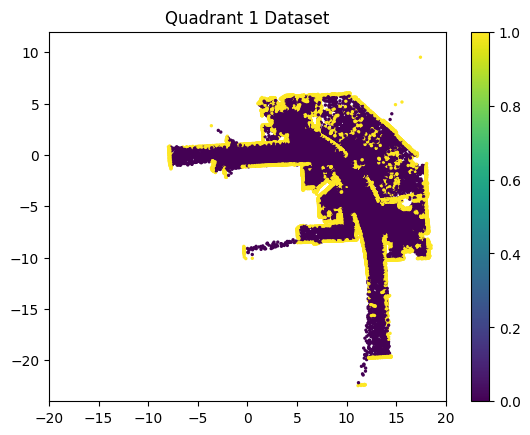

In [12]:
pcs = data_loader.point_clouds

plt.figure()

quadrant1_pcs = []

for idx, pc in enumerate(pcs):
    if idx in quadrant_dict["quadrant_1"]:
        quadrant1_pcs.append(pc)
        plt.scatter(pc[:,0], pc[:,1], c=pc[:, 2], s=2)

print(f"Number of Point Clouds: {len(quadrant1_pcs)}")
print(f"Number of Points: {sum([pc.shape[0] for pc in quadrant1_pcs])}")
print(f"Number of Occupied Points: {sum([np.sum(pc[:, 2]) for pc in quadrant1_pcs])}")
print(f"Number of Free Points: {sum([np.sum(1 - pc[:, 2]) for pc in quadrant1_pcs])}")

q1_sp: str = os.path.join(".", "intel-quadrant1.pkl")
with open(q1_sp, "wb") as f:
    pkl.dump(quadrant1_pcs, f)

plt.title('Quadrant 1 Dataset')
plt.xlim(world_space[0], world_space[1])
plt.ylim(world_space[2], world_space[3])
plt.colorbar()
plt.savefig("intel-fusion-quadrant_1.png", dpi=500)
plt.show()

Number of Point Clouds: 161
Number of Points: 68540
Number of Occupied Points: 28825.0
Number of Free Points: 39715.0


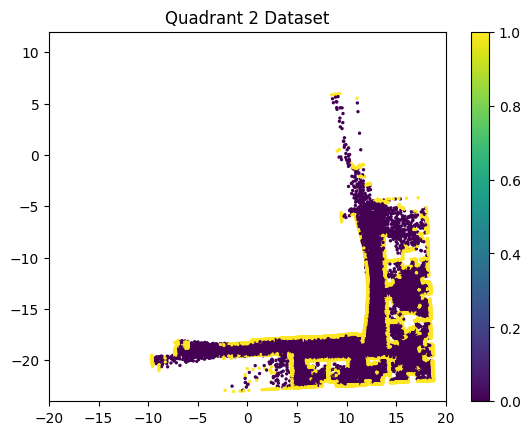

In [13]:
pcs = data_loader.point_clouds

plt.figure()

quadrant2_pcs = []

for idx, pc in enumerate(pcs):
    if idx in quadrant_dict["quadrant_2"]:
        quadrant2_pcs.append(pc)
        plt.scatter(pc[:,0], pc[:,1], c=pc[:, 2], s=2)

print(f"Number of Point Clouds: {len(quadrant2_pcs)}")
print(f"Number of Points: {sum([pc.shape[0] for pc in quadrant2_pcs])}")
print(f"Number of Occupied Points: {sum([np.sum(pc[:, 2]) for pc in quadrant2_pcs])}")
print(f"Number of Free Points: {sum([np.sum(1 - pc[:, 2]) for pc in quadrant2_pcs])}")

q2_sp: str = os.path.join(".", "intel-quadrant2.pkl")
with open(q2_sp, "wb") as f:
    pkl.dump(quadrant2_pcs, f)

plt.title('Quadrant 2 Dataset')
plt.xlim(world_space[0], world_space[1])
plt.ylim(world_space[2], world_space[3])
plt.colorbar()
plt.savefig("intel-fusion-quadrant_2.png", dpi=500)
plt.show()

Number of Point Clouds: 283
Number of Points: 120135
Number of Occupied Points: 50810.0
Number of Free Points: 69325.0


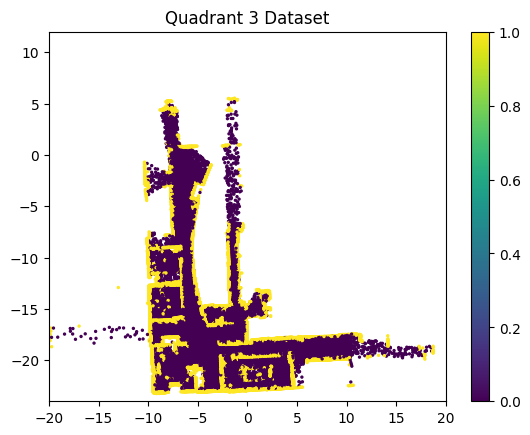

In [14]:
pcs = data_loader.point_clouds

plt.figure()

quadrant3_pcs = []

for idx, pc in enumerate(pcs):
    if idx in quadrant_dict["quadrant_3"]:
        quadrant3_pcs.append(pc)
        plt.scatter(pc[:,0], pc[:,1], c=pc[:, 2], s=2)

print(f"Number of Point Clouds: {len(quadrant3_pcs)}")
print(f"Number of Points: {sum([pc.shape[0] for pc in quadrant3_pcs])}")
print(f"Number of Occupied Points: {sum([np.sum(pc[:, 2]) for pc in quadrant3_pcs])}")
print(f"Number of Free Points: {sum([np.sum(1 - pc[:, 2]) for pc in quadrant3_pcs])}")

q3_sp: str = os.path.join(".", "intel-quadrant3.pkl")
with open(q3_sp, "wb") as f:
    pkl.dump(quadrant3_pcs, f)

plt.title('Quadrant 3 Dataset')
plt.xlim(world_space[0], world_space[1])
plt.ylim(world_space[2], world_space[3])
plt.colorbar()
plt.savefig("intel-fusion-quadrant_3.png", dpi=500)
plt.show()

Number of Point Clouds: 244
Number of Points: 99142
Number of Occupied Points: 42983.0
Number of Free Points: 56159.0


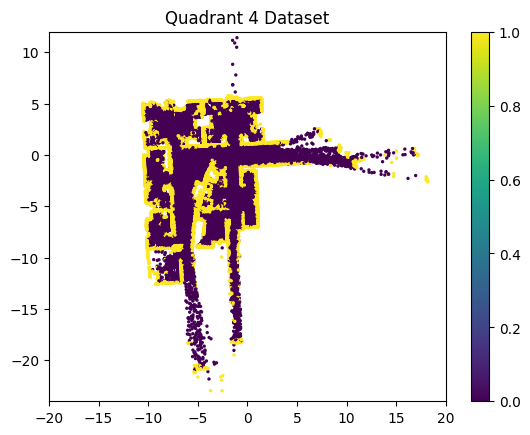

In [15]:
pcs = data_loader.point_clouds

plt.figure()

quadrant4_pcs = []

for idx, pc in enumerate(pcs):
    if idx in quadrant_dict["quadrant_4"]:
        quadrant4_pcs.append(pc)
        plt.scatter(pc[:,0], pc[:,1], c=pc[:, 2], s=2)

print(f"Number of Point Clouds: {len(quadrant4_pcs)}")
print(f"Number of Points: {sum([pc.shape[0] for pc in quadrant4_pcs])}")
print(f"Number of Occupied Points: {sum([np.sum(pc[:, 2]) for pc in quadrant4_pcs])}")
print(f"Number of Free Points: {sum([np.sum(1 - pc[:, 2]) for pc in quadrant4_pcs])}")

q4_sp: str = os.path.join(".", "intel-quadrant4.pkl")
with open(q4_sp, "wb") as f:
    pkl.dump(quadrant4_pcs, f)

plt.title('Quadrant 4 Dataset')
plt.xlim(world_space[0], world_space[1])
plt.ylim(world_space[2], world_space[3])
plt.colorbar()
plt.savefig("intel-fusion-quadrant_4.png", dpi=500)
plt.show()